In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix

# Data Preparation

In [ ]:
# Mount gdrive
from google.colab import drive, files
drive.mount('gdrive')

In [3]:
# Specify input file location
training_file = 'gdrive/My Drive/shopee/train.csv'
test_file = 'gdrive/My Drive/shopee/test.csv'
user_file = 'gdrive/My Drive/shopee/users.csv'

In [4]:
# Load dataset
training_data = pd.read_csv(training_file)
test_data = pd.read_csv(test_file)
user_data = pd.read_csv(user_file)

In [5]:
# Merge with user data
training_data = pd.merge(training_data, user_data, on='user_id', how='inner')
test_data = pd.merge(test_data, user_data, on='user_id', how='inner')

In [6]:
# Change column type in training data
training_data['country_code'] = training_data['country_code'].astype('str')
training_data['attr_3'] = training_data['attr_3'].astype('str')
training_data['grass_date'] = pd.to_datetime(
    training_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

# Change column type in test data
test_data['country_code'] = test_data['country_code'].astype('str')
test_data['attr_3'] = test_data['attr_3'].astype('str')
test_data['grass_date'] = pd.to_datetime(
    test_data.grass_date, 
    format='%Y-%m-%d %H:%M:%S', 
    errors='coerce'
)

In [7]:
# Specify input variables
variables = [
    'country_code',
    'subject_line_length', 
    'open_count_last_10_days',
    'open_count_last_30_days',
    'open_count_last_60_days',
    'domain'
]

In [8]:
# Filter the data
x = training_data[variables]
y = training_data['open_flag']
x_test = test_data[variables]

In [9]:
# Encode categorical variables
x = pd.get_dummies(x)
x_test = pd.get_dummies(x_test)

In [10]:
# Split the data into training and validation set
x_train, x_validation, y_train, y_validation = train_test_split(
    x, 
    y, 
    test_size=0.2,
    random_state=42
)

In [11]:
# Generate a normalizer
scaler = preprocessing.StandardScaler().fit(x_train)

# Normalize the data
x_train = scaler.transform(x_train)
x_validation = scaler.transform(x_validation)
x_test = scaler.transform(x_test)

# Modeling

In [ ]:
# Use artificial data
oversampling = SMOTE(sampling_strategy=0.5)
x_train, y_train = oversampling.fit_sample(x_train, y_train)

In [13]:
# Train the classifier
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Evaluate the model
y_prediction = classifier.predict(x_validation)
print("Accuracy\t: %.4f" % accuracy_score(y_validation, y_prediction))
print("MCC\t\t: %.4f" % matthews_corrcoef(y_validation, y_prediction))

Accuracy	: 0.8700
MCC		: 0.5026


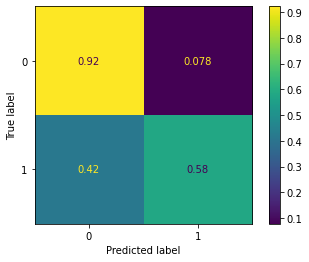

In [15]:
# Show confusion matrix
plot_confusion_matrix(classifier, x_validation, y_validation, normalize='true');

# Submission

In [16]:
# Generate prediction
prediction = classifier.predict(x_test)
test_data['open_flag'] = prediction

In [17]:
# Generate submission file
test_data.loc[:, ['row_id', 'open_flag']].to_csv('submission.csv', index=False)